# 言語モデル
文章（時系列データ）から次の単語を予測する

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from rnnlm import Rnnlm


# ハイパーパラメータの設定
batch_size = 20
wordvec_size = 100 #単語を分散表現のベクトルに変換する
hidden_size = 100  # RNNの隠れ状態ベクトルの要素数
time_size = 35  # RNNを展開するサイズ
lr = 20.0
max_epoch = 4
max_grad = 0.25

## 学習データ：ptbデータセット
- word2vecやRNNの学習でよく使われるデータセット．テキストファイルで提供されている．
- レアな単語を<unk>という特殊文字に置き換えたり，数字をNで置き換えたりの前処理がされている


In [ ]:
# 学習データの読み込み
corpus, word_to_id, id_to_word = ptb.load_data('train')
print("コーパスの長さ",len(corpus))
vocab_size = len(word_to_id)
print("含まれる語彙数",vocab_size)
xs = corpus[:-1] #入力データ
ts = corpus[1:] #正解データ

corpus_test, _, _ = ptb.load_data('test')
print("testのコーパスの大きさ", len(corpus_test))


コーパスの長さ 929589
含まれる語彙数 10000
testのコーパスの大きさ 82430


In [8]:
print('corpus[:10]',corpus[:10])
print('id_to_word[3856]:',id_to_word[3856])
print("word_to_id['car']:", word_to_id['car'])

corpus[:10] [0 1 2 3 4 5 6 7 8 9]
id_to_word[3856]: car
word_to_id['car']: 3856


## モデルの評価：perplexity
次の単語について分岐数（のようなもの）を評価する
- perplexity = 100000：次の単語の候補は100000個（学習前）
- perplexity = 1000：次の単語の候補は1000（学習後）　

| epoch 1 |  iter 1 / 1327 | time 0[s] | perplexity 10000.81
| epoch 1 |  iter 21 / 1327 | time 3[s] | perplexity 9982.71
| epoch 1 |  iter 41 / 1327 | time 6[s] | perplexity 9949.00
| epoch 1 |  iter 61 / 1327 | time 10[s] | perplexity 9915.92
| epoch 1 |  iter 81 / 1327 | time 13[s] | perplexity 9887.12
| epoch 1 |  iter 101 / 1327 | time 16[s] | perplexity 9852.36
| epoch 1 |  iter 121 / 1327 | time 19[s] | perplexity 9817.54
| epoch 1 |  iter 141 / 1327 | time 23[s] | perplexity 9783.75
| epoch 1 |  iter 161 / 1327 | time 26[s] | perplexity 9743.19
| epoch 1 |  iter 181 / 1327 | time 29[s] | perplexity 9720.91
| epoch 1 |  iter 201 / 1327 | time 32[s] | perplexity 9671.76
| epoch 1 |  iter 221 / 1327 | time 36[s] | perplexity 9647.84
| epoch 1 |  iter 241 / 1327 | time 39[s] | perplexity 9617.88
| epoch 1 |  iter 261 / 1327 | time 42[s] | perplexity 9601.39
| epoch 1 |  iter 281 / 1327 | time 45[s] | perplexity 9557.52
| epoch 1 |  iter 301 / 1327 | time 49[s] | perplexity 9528.90


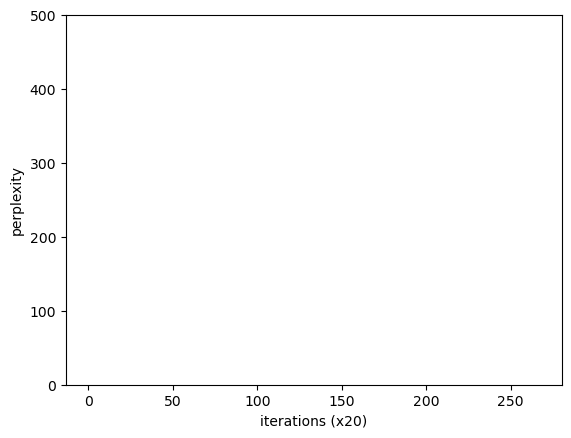

In [3]:
#モデルの作成
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD()
trainer = RnnlmTrainer(model, optimizer)

#勾配クリッピングで爆発を予防
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad, eval_interval = 20)


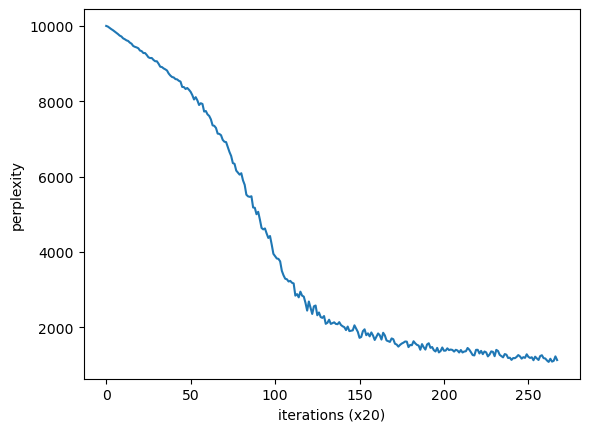

In [5]:
trainer.plot()

In [4]:
# テストデータで評価
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('test perplexity: ', ppl_test)

# パラメータの保存
model.save_params()

evaluating perplexity ...
234 / 235
test perplexity:  1103.6058137075233
